# Lok Sabha Election 2024 Analysis 

**I accessed the official website of the Election Commission of India (https://results.eci.gov.in/) to extract comprehensive data from the 2024 Lok Sabha elections.**

**Let's import the given dataset and explore it.**


# Importing Necessities

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Importing the DataSet

In [58]:
er=pd.read_csv('election_results_2024.csv') #Reads and imports the dataset

# Data Overview

In [25]:
er.head() 

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


In [26]:
er.tail()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
538,Wardha,8,AMAR SHARADRAO KALE,Nationalist Congress Party – Sharadchandra Pawar,RAMDAS CHANDRABHAN TADAS,Bharatiya Janata Party,81648,Result Declared
539,Wayanad,4,RAHUL GANDHI,Indian National Congress,ANNIE RAJA,Communist Party of India,364422,Result Declared
540,West Delhi,6,KAMALJEET SEHRAWAT,Bharatiya Janata Party,MAHABAL MISHRA,Aam Aadmi Party,199013,Result Declared
541,Yavatmal- Washim,14,SANJAY UTTAMRAO DESHMUKH,Shiv Sena (Uddhav Balasaheb Thackrey),RAJSHRITAI HEMANT PATIL (MAHALLE),Shiv Sena,94473,Result Declared
542,Zahirabad,5,SURESH KUMAR SHETKAR,Indian National Congress,B. B. PATIL,Bharatiya Janata Party,46188,Result Declared


# DATA CLEANING

**Let's check if our dataset is clean, meaning we should verify if there are any duplicates, NaN, and null values.**

In [27]:
# Check for missing values
print(er.isnull().sum())

Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    1
Trailing Party        1
Margin                0
Status                0
dtype: int64


In [28]:
# Check for NaN values in each column
nan_values = er.isna().sum()
print("NaN values:\n", nan_values)

# Check for null values in each column
null_values = er.isnull().sum()
print("Null values:\n", null_values)

NaN values:
 Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    1
Trailing Party        1
Margin                0
Status                0
dtype: int64
Null values:
 Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    1
Trailing Party        1
Margin                0
Status                0
dtype: int64


**We can see that we have NaN and null values. Let's check for duplicates.**

In [33]:
# Check for duplicate rows
duplicate_rows = er[er.duplicated()]
print("Duplicate rows:\n", duplicate_rows)

# Count the number of duplicate rows
print("Number of duplicate rows:", duplicate_rows.shape[0])

Duplicate rows:
 Empty DataFrame
Columns: [Constituency, Const. No., Leading Candidate, Leading Party, Trailing Candidate, Trailing Party, Margin, Status]
Index: []
Number of duplicate rows: 0


**There are no duplicates in our data set**

In [29]:
surat_details = er[er['Constituency'] == 'Surat']
print(surat_details)

    Constituency  Const. No.               Leading Candidate  \
493        Surat          24  MUKESHKUMAR CHANDRAKAANT DALAL   

              Leading Party Trailing Candidate Trailing Party Margin  \
493  Bharatiya Janata Party                NaN            NaN      -   

          Status  
493  Uncontested  


**During our data exploration, we found a row with NaN values. However, we do not need to drop this row as the status is 'uncontested'.**

**Having explored the data and found no duplicate values, we now have a clean DataFrame ready for analysis.**

# Descriptive Statistics

In [34]:
# Summary statistics for numerical columns
summary_stats = er.describe()
print(summary_stats)

       Const. No.
count  543.000000
mean    18.178637
std     16.427840
min      1.000000
25%      6.000000
50%     14.000000
75%     25.000000
max     80.000000


# Categorical Analysis

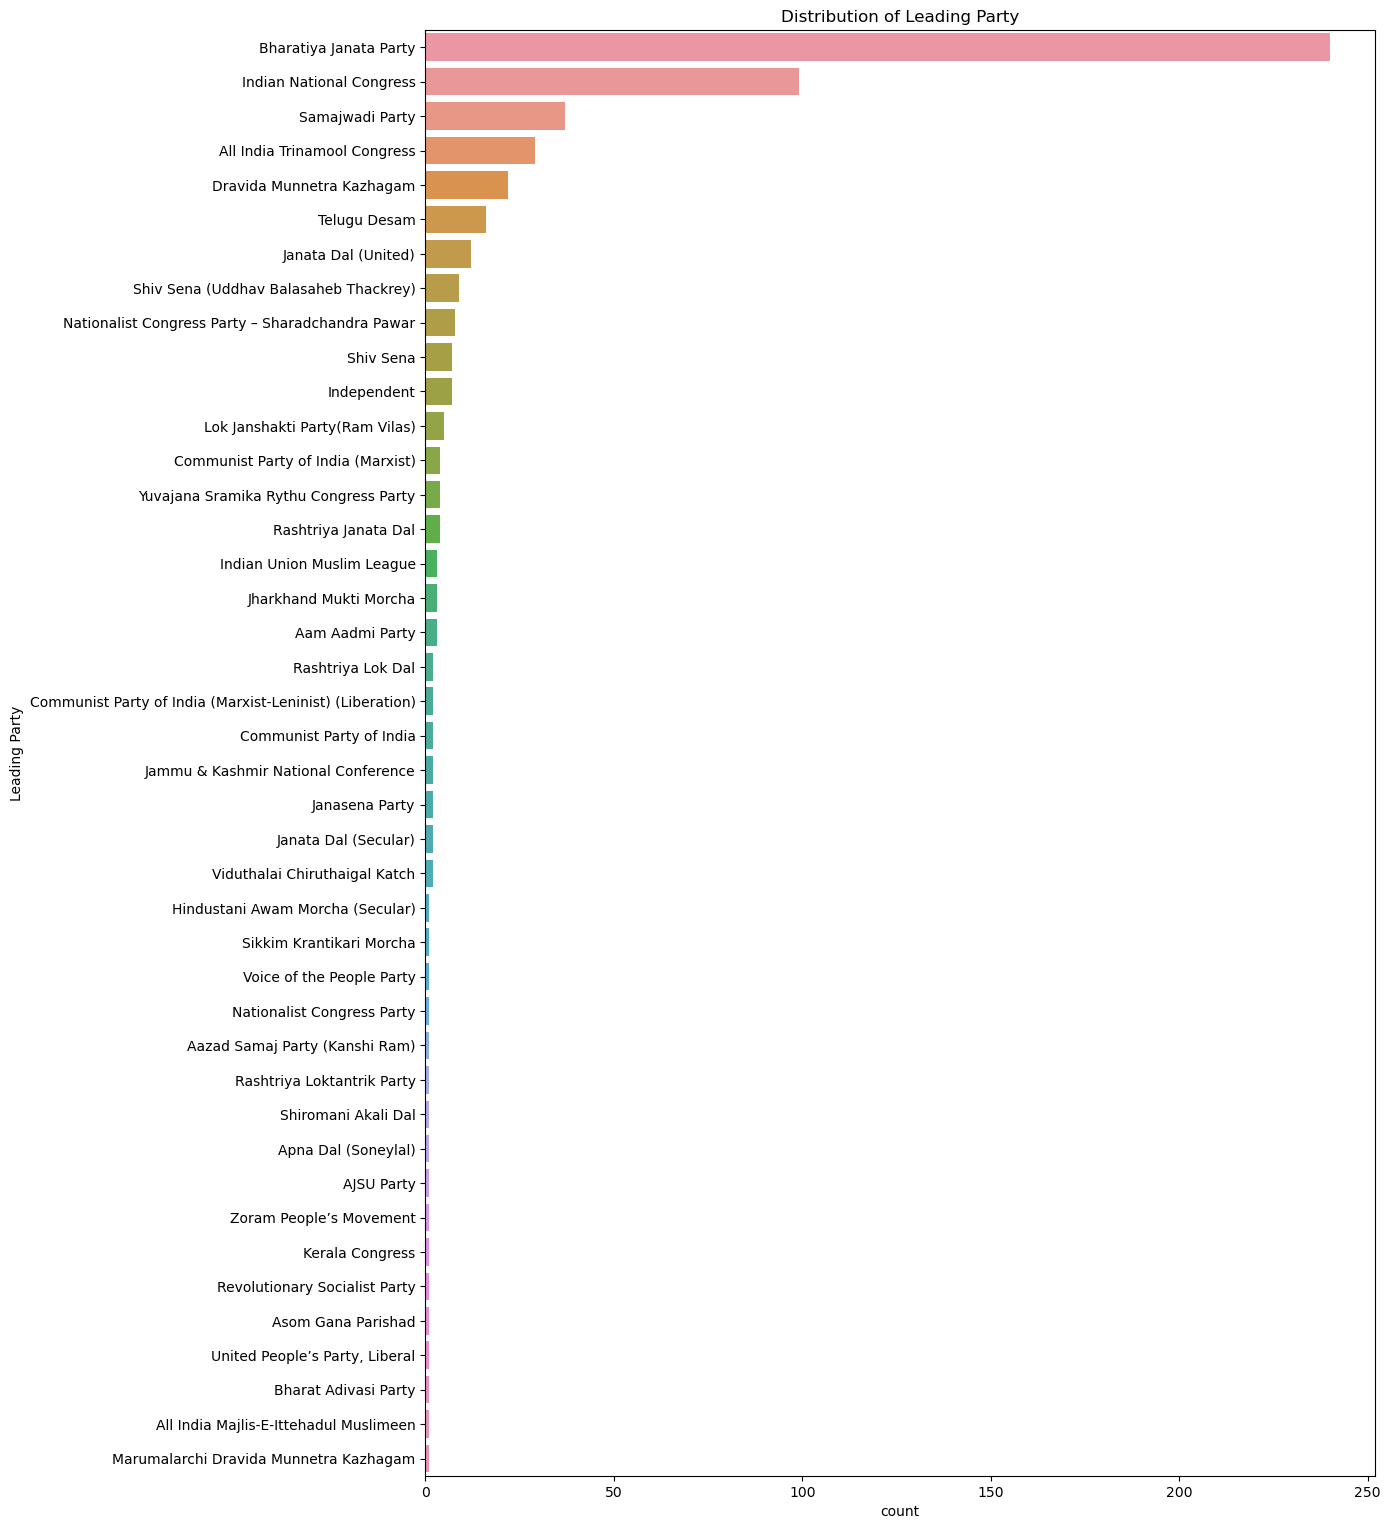

In [35]:
# Categorical analysis: Count plots for categorical variables
plt.figure(figsize=(14,30))

# Count plot for Leading Party
plt.subplot(2, 1, 1)
sns.countplot(y=er['Leading Party'], order=er['Leading Party'].value_counts().index)
plt.title('Distribution of Leading Party')

plt.tight_layout()
plt.show()

# Toughest competition

In [36]:
# smallest margin to find where the competition was toughest
er['Margin'] = pd.to_numeric(er['Margin'], errors='coerce')
tough_competition = er.sort_values(by='Margin').head(10)
print(tough_competition[['Constituency', 'Leading Candidate', 'Leading Party', 'Trailing Candidate', 'Trailing Party', 'Margin']])

          Constituency          Leading Candidate             Leading Party  \
357  Mumbai North West   RAVINDRA DATTARAM WAIKAR                 Shiv Sena   
40            Attingal          ADV ADOOR PRAKASH  Indian National Congress   
236             Jajpur    RABINDRA NARAYAN BEHERA    Bharatiya Janata Party   
226       JAIPUR RURAL         RAO RAJENDRA SINGH    Bharatiya Janata Party   
256             KANKER                BHOJRAJ NAG    Bharatiya Janata Party   
125         Chandigarh              MANISH TEWARI  Indian National Congress   
207           Hamirpur        AJENDRA SINGH LODHI           Samajwadi Party   
312        Lakshadweep  MUHAMMED HAMDULLAH SAYEED  Indian National Congress   
175        Farrukhabad              MUKESH RAJPUT    Bharatiya Janata Party   
74            Bansgaon             KAMLESH PASWAN    Bharatiya Janata Party   

                  Trailing Candidate  \
357            AMOL GAJANAN KIRTIKAR   
40                             V JOY   
236       

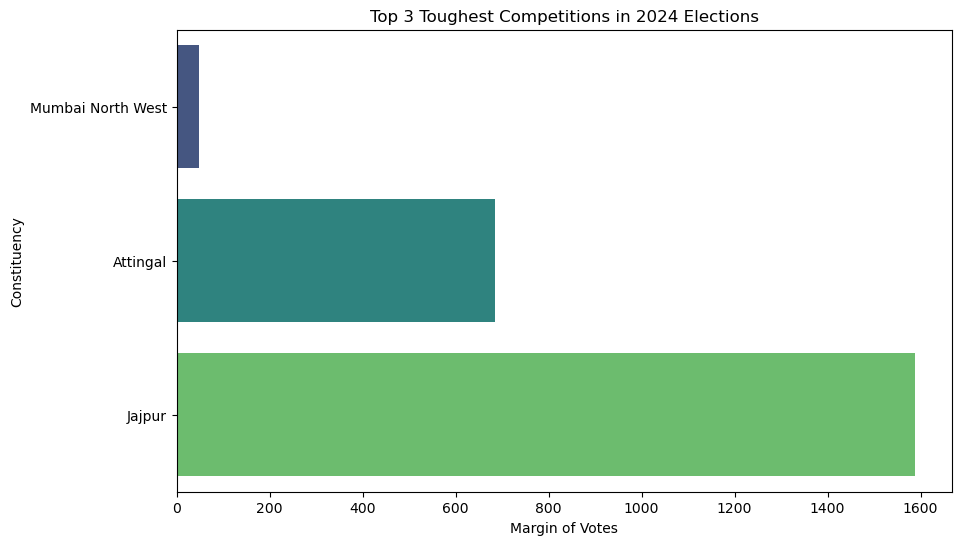

In [37]:
# Plotting the top 3 toughest competition areas
plt.figure(figsize=(10, 6))
top_3_competition = tough_competition.head(3)
sns.barplot(x='Margin', y='Constituency', data=top_3_competition, palette='viridis')
plt.title('Top 3 Toughest Competitions in 2024 Elections')
plt.xlabel('Margin of Votes')
plt.ylabel('Constituency')
plt.show()

**The toughest competition was in Mumbai North West with a margin of just 48 votes between the leading and trailing candidates.
Other constituencies with close margins include Attingal (684 votes), Jajpur (1587 votes), and Jaipur Rural (1615 votes).**

# Numner of Seats Won By Each Party & Average Margin of Victory for Each Party

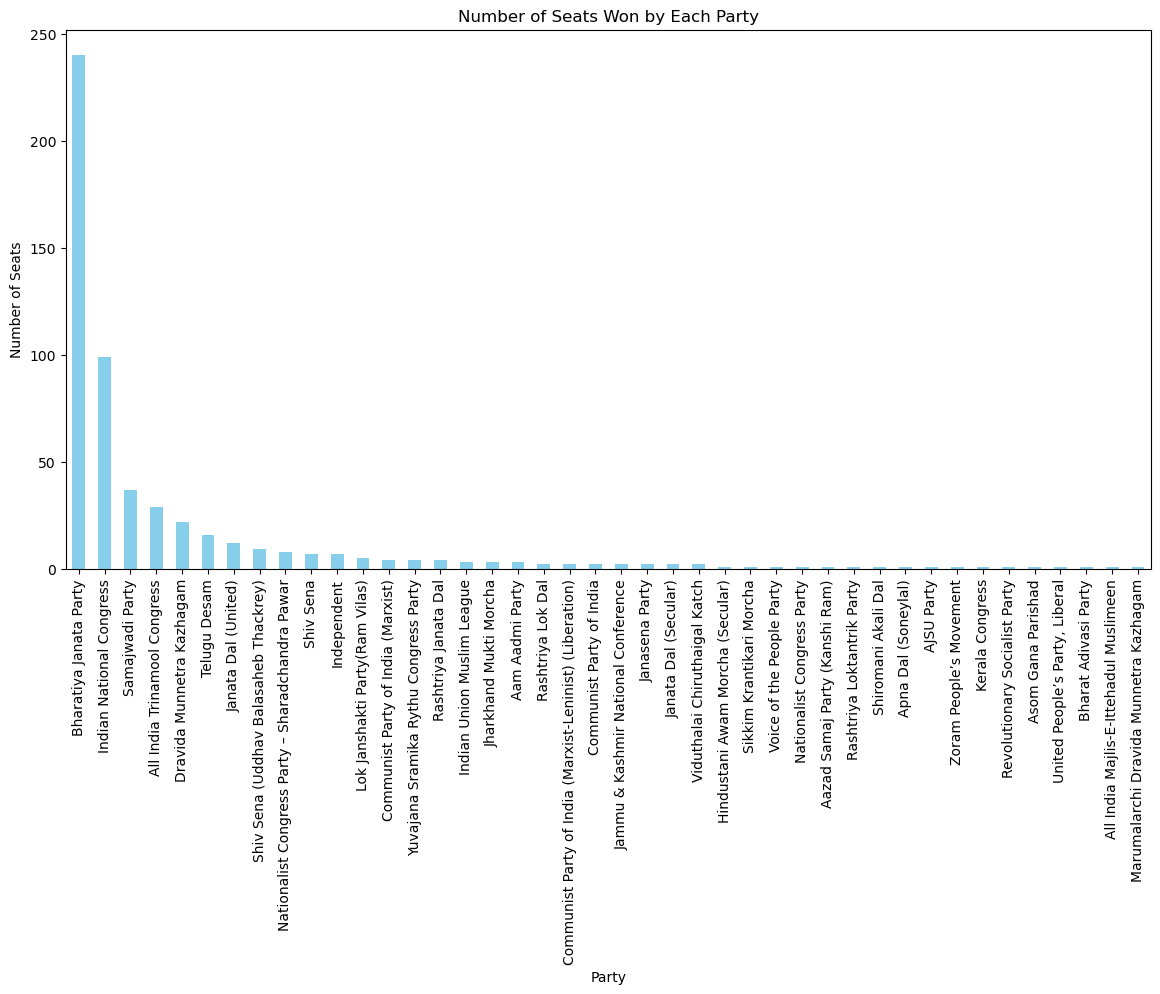

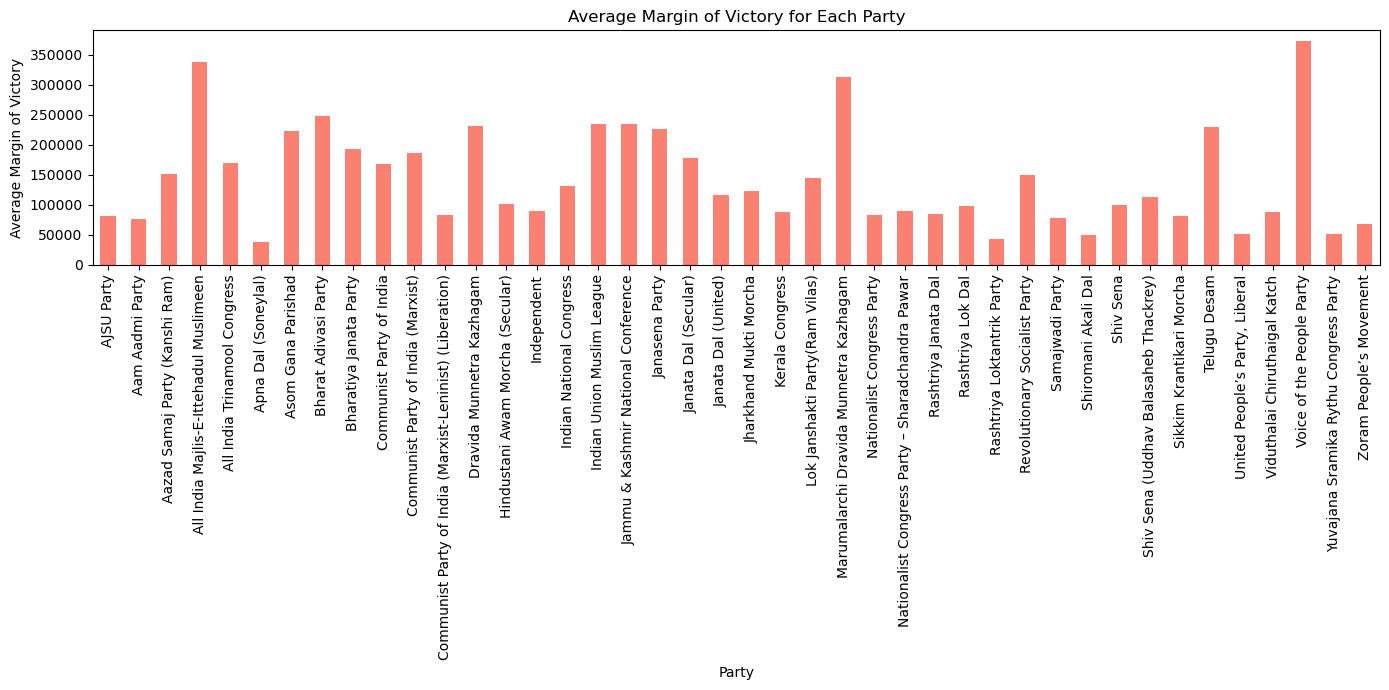

In [51]:
# Group by Leading Party to get the number of seats won
seats_won = er['Leading Party'].value_counts()

# Group by Leading Party to get the average margin of victory
average_margin = er.groupby('Leading Party')['Margin'].mean()

# Plotting the number of seats won by each party
plt.figure(figsize=(14, 7))
seats_won.plot(kind='bar', color='skyblue')
plt.title('Number of Seats Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation=90)
plt.show()

# Plotting the average margin of victory for each party
plt.figure(figsize=(14, 7))
average_margin.plot(kind='bar', color='salmon')
plt.title('Average Margin of Victory for Each Party')
plt.xlabel('Party')
plt.ylabel('Average Margin of Victory')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Top Regions with Highest Margins for Top 3 Parties

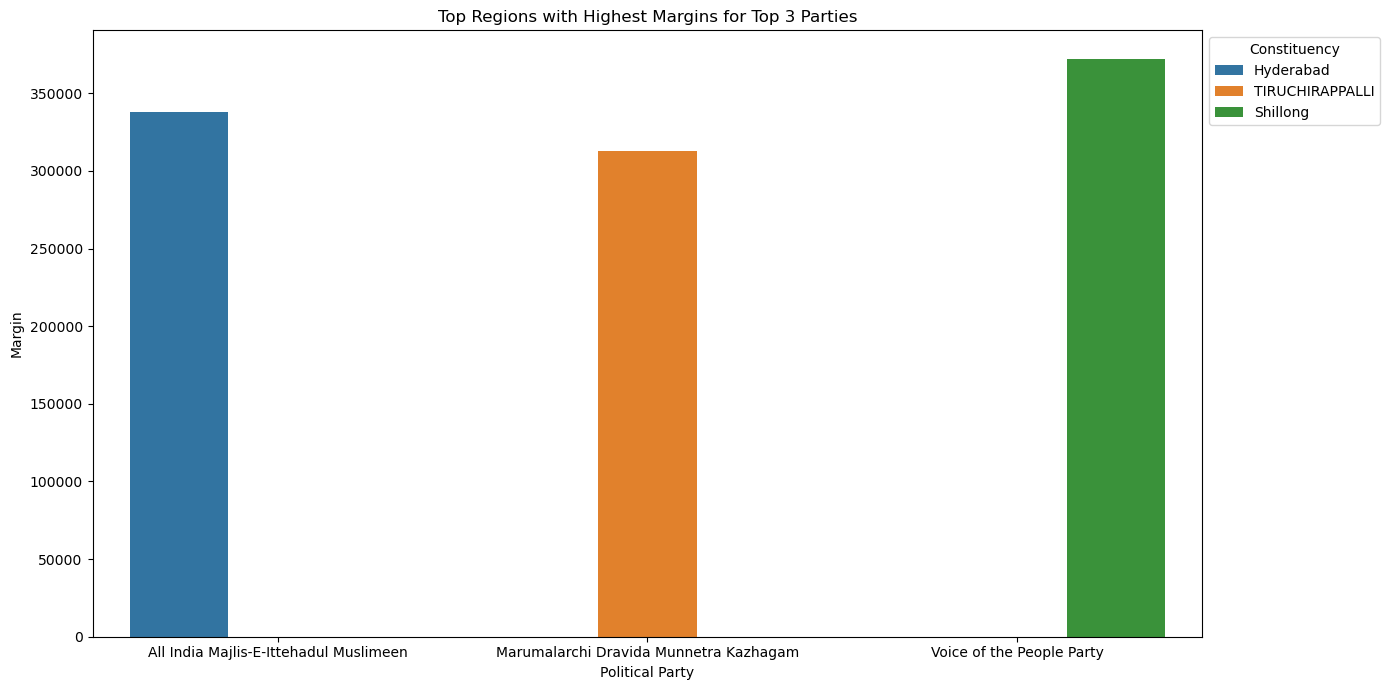

In [47]:
er['Margin'] = pd.to_numeric(er['Margin'], errors='coerce')

# Group by 'Leading Party' and get the top 3 parties with the highest average margin
top_parties = er.groupby('Leading Party')['Margin'].mean().nlargest(3)

# Filter the dataframe for the top 3 parties
top_parties_er = er[er['Leading Party'].isin(top_parties.index)]

# Group by 'Leading Party' and 'Constituency' to find the regions with the highest margins for each party
top_regions = top_parties_er.groupby(['Leading Party', 'Constituency'])['Margin'].max().reset_index()

# Plot the results
plt.figure(figsize=(14, 7))
sns.barplot(x='Leading Party', y='Margin', hue='Constituency', data=top_regions)
plt.title('Top Regions with Highest Margins for Top 3 Parties')
plt.xlabel('Political Party')
plt.ylabel('Margin')
plt.legend(title='Constituency', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


**Average margins for the top 3 parties:**

Voice of the People Party: 371910.00

All India Majlis-E-Ittehadul Muslimeen: 338087.00

Marumalarchi Dravida Munnetra Kazhagam: 313094.00

Based on these results, we can see that the top 3 parties with the highest margins are:

**Voice of the People Party
All India Majlis-E-Ittehadul Muslimeen
Marumalarchi Dravida Munnetra Kazhagam
Interestingly, these parties won with significant margins in specific constituencies. The Voice of the People Party had the highest average margin, winning by 371,910 votes in Shillong. The All India Majlis-E-Ittehadul Muslimeen won by 338,087 votes in Hyderabad, and the Marumalarchi Dravida Munnetra Kazhagam won by 313,094 votes in Tiruchirappalli.**

**It's worth noting that these parties might have strong regional influences, as they won with high margins in specific areas. However, this analysis doesn't provide information about their overall performance across multiple constituencies or their total seat count in the election.**

# Top 5 Constituencies by Margin

Constituency with the highest margin:
Constituency                     INDORE
Leading Party    Bharatiya Janata Party
Margin                        1175092.0
Name: 221, dtype: object


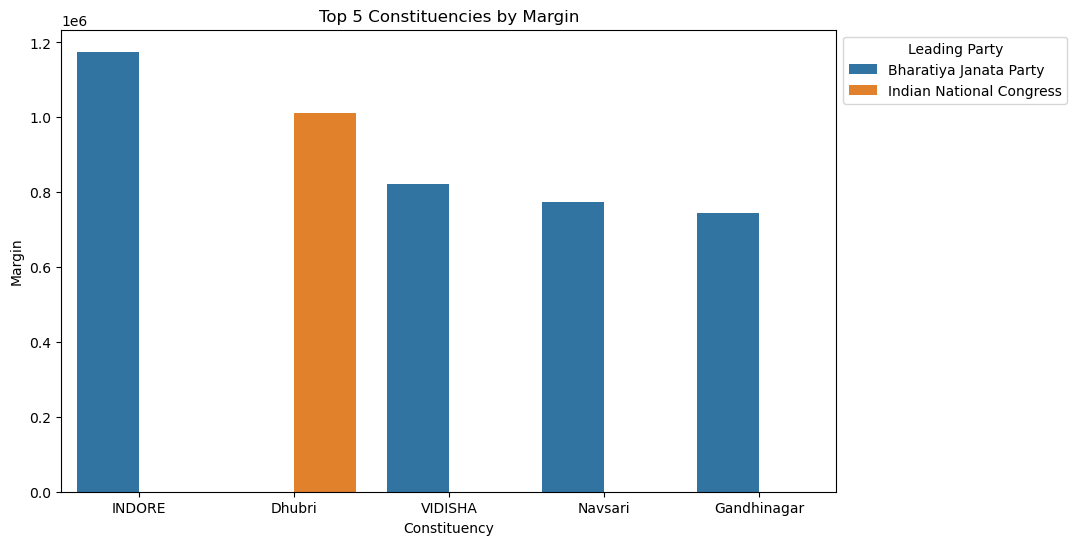

In [40]:
# Sorting the dataframe by Margin in descending order to get the top 5
top_5 = er.sort_values('Margin', ascending=False).head(5)

# Print the constituency with the highest margin
print('Constituency with the highest margin:')
print(top_5[['Constituency', 'Leading Party', 'Margin']].iloc[0])

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Constituency', y='Margin', hue='Leading Party', data=top_5)
plt.title('Top 5 Constituencies by Margin')
plt.xlabel('Constituency')
plt.ylabel('Margin')
plt.legend(title='Leading Party', bbox_to_anchor=(1.0,1.0))
plt.show()


**The constituency with the highest margin is Indore, where the Bharatiya Janata Party won by a margin of 1,175,092 votes. This indicates that in Indore, people were overwhelmingly supportive of the Bharatiya Janata Party, leaving little chance for other parties to win.**

# Top 10 trailing candidates

                  Trailing Candidate  \
357            AMOL GAJANAN KIRTIKAR   
40                             V JOY   
236                  SARMISTHA SETHI   
226                      ANIL CHOPRA   
256                    BIRESH THAKUR   
125                    SANJAY TANDON   
207  KUNWAR PUSHPENDRA SINGH CHANDEL   
312               MOHAMMED FAIZAL PP   
175          DR. NAVAL KISHOR SHAKYA   
74                      SADAL PRASAD   

                                       Trailing Party  \
357             Shiv Sena (Uddhav Balasaheb Thackrey)   
40                 Communist Party of India (Marxist)   
236                                   Biju Janata Dal   
226                          Indian National Congress   
256                          Indian National Congress   
125                            Bharatiya Janata Party   
207                            Bharatiya Janata Party   
312  Nationalist Congress Party – Sharadchandra Pawar   
175                                   Samajwad

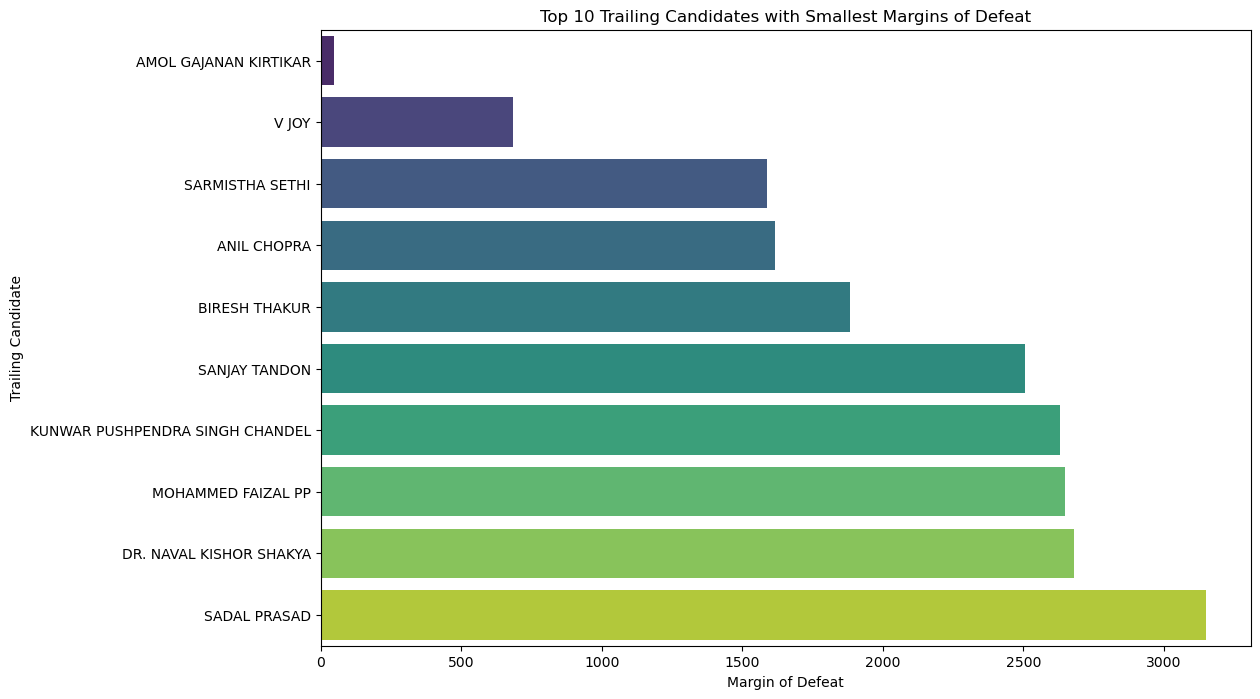

In [49]:
# Sorting the dataset by margin of defeat in ascending order
ser = er.sort_values(by='Margin', ascending=True)
# Extracting the top 10 trailing candidates with the smallest margins of defeat
top_trailing_candidates = ser[['Trailing Candidate', 'Trailing Party', 'Leading Candidate', 'Leading Party', 'Margin']].head(10)
print(top_trailing_candidates)
# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Margin', y='Trailing Candidate', data=top_trailing_candidates, palette='viridis')
plt.xlabel('Margin of Defeat')
plt.ylabel('Trailing Candidate')
plt.title('Top 10 Trailing Candidates with Smallest Margins of Defeat')
plt.show()

**Potential Future Contenders**
The trailing candidates identified in this analysis have shown strong performances despite their losses, indicating they could be significant contenders in future elections. Their narrow margins of defeat suggest they have a robust voter base and a high potential for future success. These candidates' close results highlight their competitiveness and the possibility of turning the tide in subsequent elections.

**Party Dynamics**
The analysis also uncovers intriguing dynamics within political parties and between major parties. For instance, the intra-party competition within Shiv Sena shows that even candidates from the same party can have highly competitive races. Additionally, the close contests between major parties like the Bharatiya Janata Party (BJP) and the Indian National Congress (INC) emphasize the intense rivalry and shifting voter preferences, providing insights into the evolving political landscape.

# Status Distribution

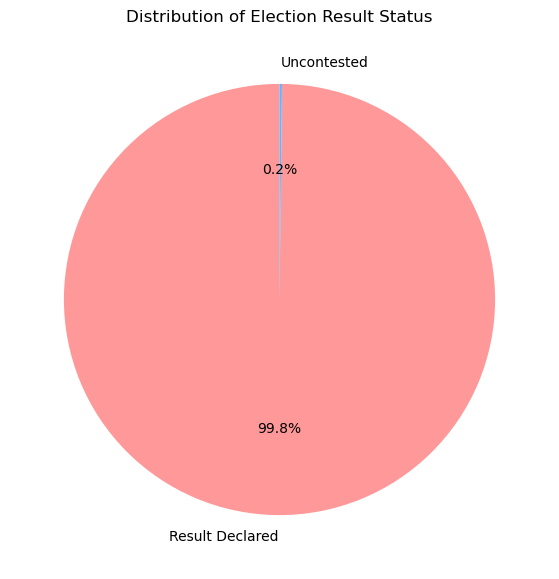

Status Distribution:
Result Declared    542
Uncontested          1
Name: Status, dtype: int64


In [43]:
status_distribution = er['Status'].value_counts()
# Plot the pie chart
plt.figure(figsize=(10, 7))
status_distribution.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Distribution of Election Result Status')
plt.ylabel('')
plt.show()
print('Status Distribution:')
print(status_distribution)


**The 0.2% shown in the graph represents Surat, where the status is uncontested.**

# Leading Party vs Trailing party of Top 3 Parties

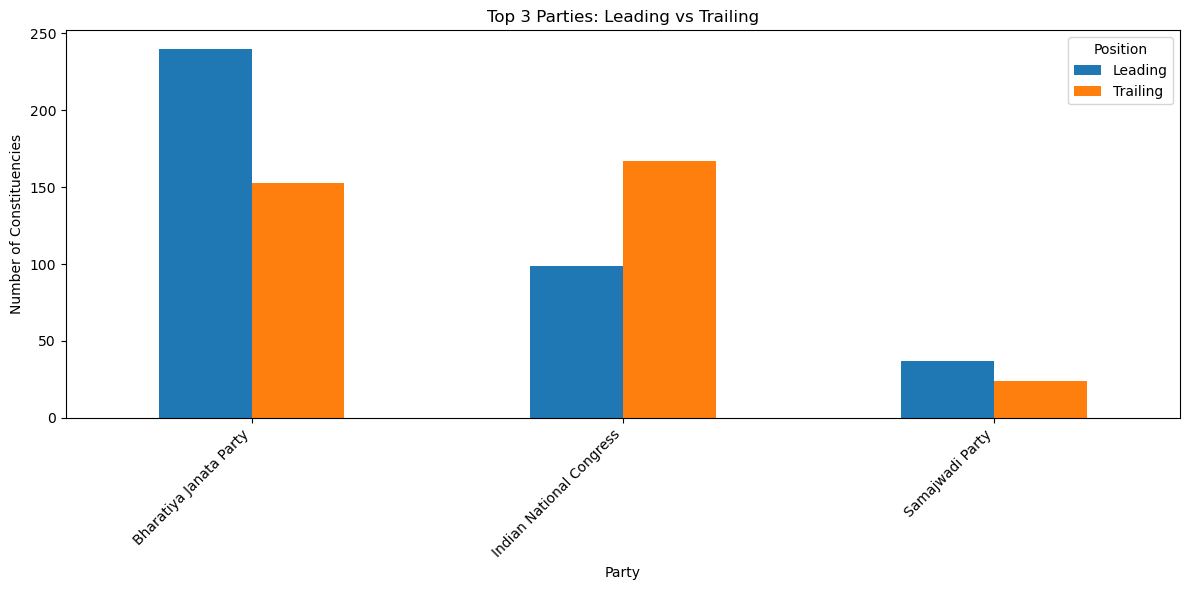

In [54]:
#Leading vs Trailing party comparison
leading_trailing = pd.DataFrame({
    'Leading': er['Leading Party'].value_counts(),
    'Trailing': er['Trailing Party'].value_counts()
}).fillna(0).sort_values('Leading', ascending=False).head(3)
leading_trailing.plot(kind='bar', figsize=(12, 6))
plt.title('Top 3 Parties: Leading vs Trailing')
plt.xlabel('Party')
plt.ylabel('Number of Constituencies')
plt.legend(title='Position')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


# Party performance by margin ranges

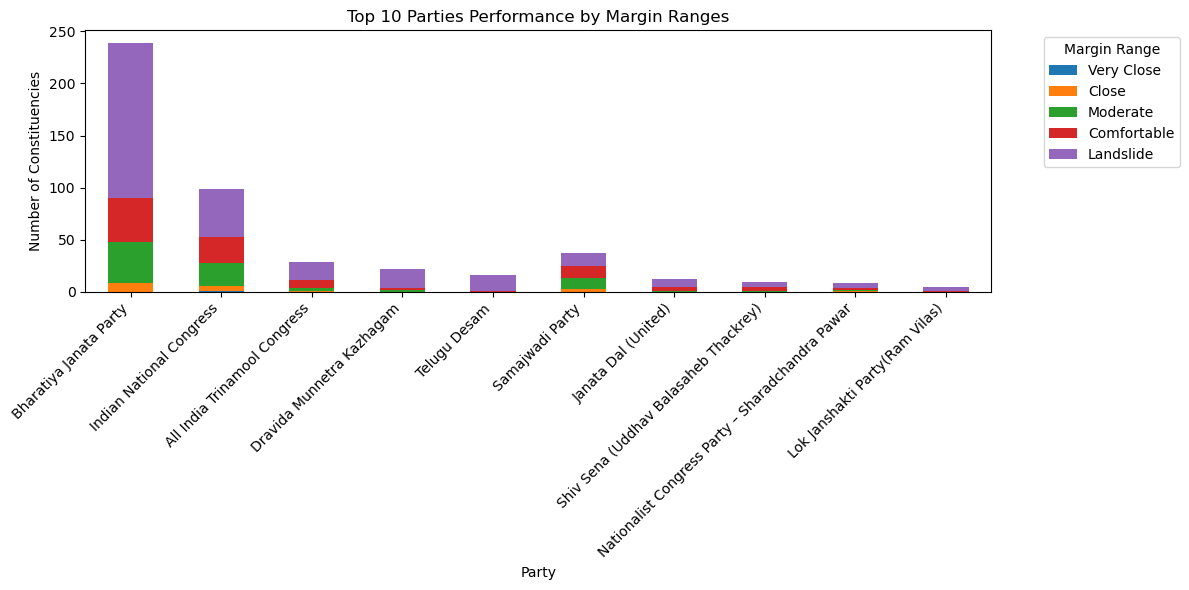

In [55]:
er['Margin Range'] = pd.cut(er['Margin'], bins=[0, 1000, 10000, 50000, 100000, float('inf')], 
                            labels=['Very Close', 'Close', 'Moderate', 'Comfortable', 'Landslide'])
party_margin_range = er.groupby(['Leading Party', 'Margin Range']).size().unstack(fill_value=0)
party_margin_range = party_margin_range.sort_values('Landslide', ascending=False).head(10)
party_margin_range.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Top 10 Parties Performance by Margin Ranges')
plt.xlabel('Party')
plt.ylabel('Number of Constituencies')
plt.legend(title='Margin Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
